<a href="https://colab.research.google.com/github/ilyes-frag/titanic-for-kaggle-submition/blob/main/Titanic_for_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install catboost


In [7]:
pip install ipywidgets

In [8]:
import math,time,datetime,random
import pandas as pd 
import numpy as np  
#vizualisation
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno
plt.style.use('seaborn-whitegrid')
#preprocessing 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize
#machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics,linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool ,cv
import warnings
warnings.filterwarnings('ignore')

# **Loading in the data**

In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')
combine = [train, test]


In [10]:
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [11]:
test.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

In [12]:
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [13]:
train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

1. **Survived**:0=NO ,1=YES
2. **pclass(ticket class):**1=1st,2=2nd,3=3nd
3.**Sex**
4. **sibsp:**number of siblings/spouses aboard the titanic
5.**parch** number of parents/childrens aboard the titanic





In [14]:
train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [15]:
len(train )

891

# **missing values are there?**

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

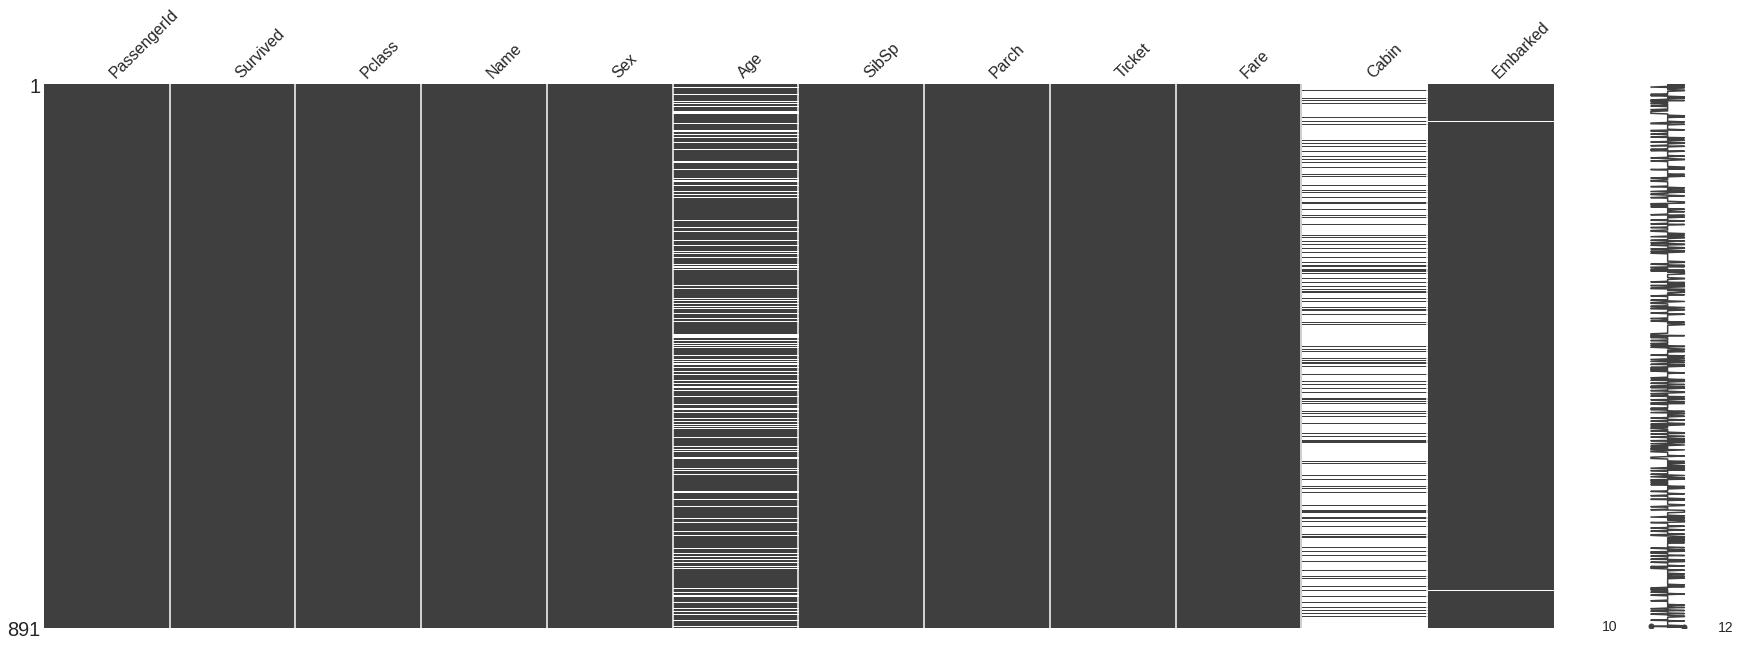

In [17]:
missingno.matrix(train,figsize=(30,10))

# **to perform our data analysis,let's create two new dataframes**

In [18]:
df_bin=pd.DataFrame()#for discretised continuous variables
df_con=pd.DataFrame()# for continuous variables

# **Let's explore each of these features individually**

In [19]:
 train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0    549
1    342
Name: Survived, dtype: int64


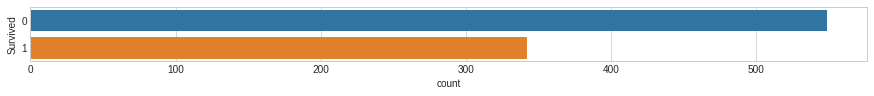

In [20]:
plt.figure(figsize=(15,1))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [21]:
#let's add this to our subset dataframe
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [22]:
df_bin.head()

Survived
0         0
1         1
2         1
3         1
4         0

# **Features:Pclass**

In [23]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

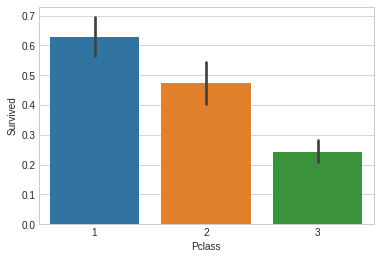

In [24]:
sns.barplot(data=train,x='Pclass',y='Survived')

In [25]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [27]:
df_bin.head()

Survived  Pclass
0         0       3
1         1       1
2         1       3
3         1       1
4         0       3

# **look at 'sex 'column**

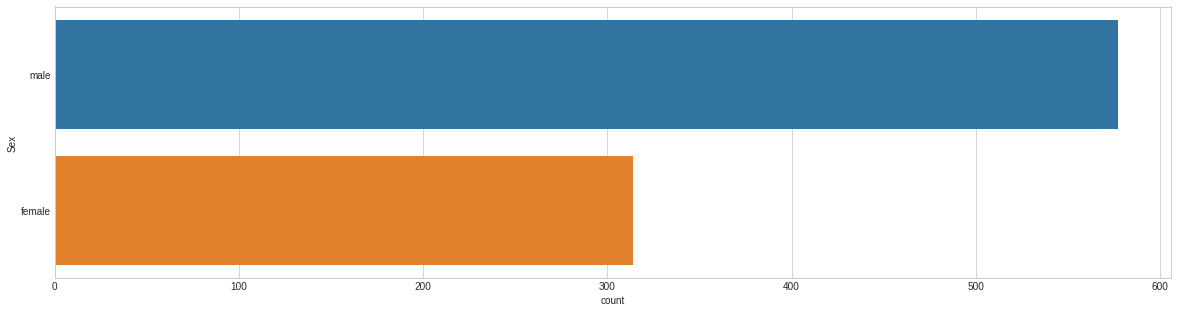

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(y='Sex',data=train)

In [29]:
#add Sex column to our dataframe
df_bin['Sex']=train['Sex']
#np.where == return the number 1 for female and  the number 0 for mal 
df_bin['Sex']=np.where(df_bin['Sex']=='female',1,0).astype(int)
df_con['Sex']=train['Sex']
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


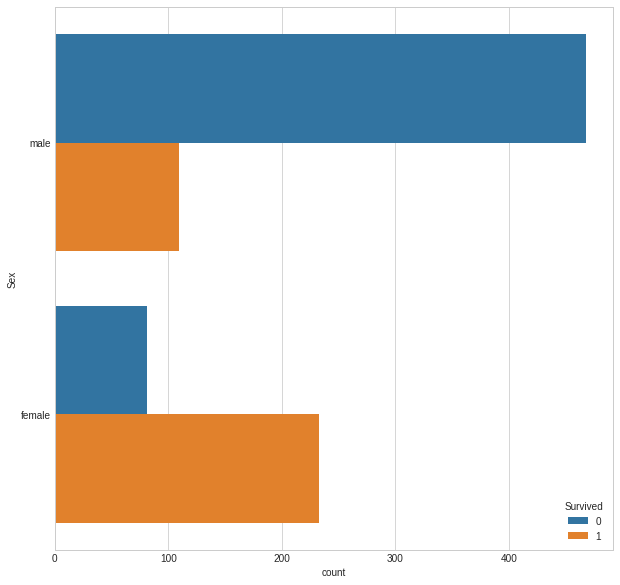

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(data=train,y='Sex',hue='Survived')

In [31]:
nombre=train.groupby('Sex').sum()
print(nombre)


        PassengerId  Survived  Pclass       Age  SibSp  Parch        Fare
Sex                                                                      
female       135343       233     678   7286.00    218    204  13966.6628
male         262043       109    1379  13919.17    248    136  14727.2865


In [32]:
#we do this just for categorical features
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

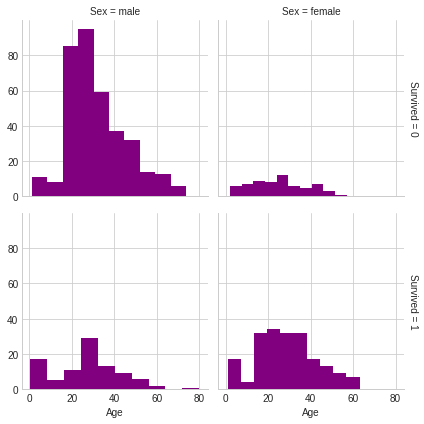

In [33]:
g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

# **feature :Age**

In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


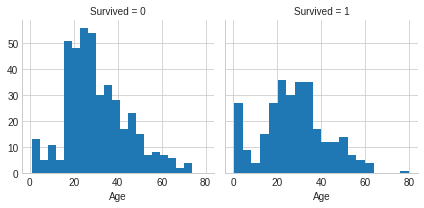

In [36]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [37]:
train["Age"] = train["Age"].replace(np.NaN, train["Age"].mean())


In [105]:
train.head(20)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0             1         0       3  ...   7.2500   NaN         S
1             2         1       1  ...  71.2833   C85         C
2             3         1       3  ...   7.9250   NaN         S
3             4         1       1  ...  53.1000  C123         S
4             5         0       3  ...   8.0500   NaN         S
5             6         0       3  ...   8.4583   NaN         Q
6             7         0       1  ...  51.8625   E46         S
7             8         0       3  ...  21.0750   NaN         S
8             9         1       3  ...  11.1333   NaN         S
9            10         1       2  ...  30.0708   NaN         C
10           11         1       3  ...  16.7000    G6         S
11           12         1       1  ...  26.5500  C103         S
12           13         0       3  ...   8.0500   NaN         S
13           14         0       3  ...  31.2750   NaN         S
14           15         0       3  ...   7.8542   NaN         S
15           16         1       2  ...  16.0000   NaN         S
16           17         0       3  ...  29.1250   NaN         Q
17           18         1       2  ...  13.0000   NaN         S
18           19         0       3  ...  18.0000   NaN         S
19           20         1       3  ...   7.2250   NaN         C

[20 rows x 12 columns]

In [39]:
train["Age"] = train["Age"].replace(np.NaN, train["Age"].mean())


In [106]:
train['Age'].isna().sum()


0

In [41]:
train['Age']=train['Age'].astype(int)

In [42]:

df_bin['Age']=train['Age']
df_con['Age']=train['Age']

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


# **Feature : SibSp**
Describtion :the number of siblings/spouses the passenger has aboard the titanic


In [44]:
SibSp_count=train.SibSp.value_counts()
print(SibSp_count)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [45]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [46]:
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

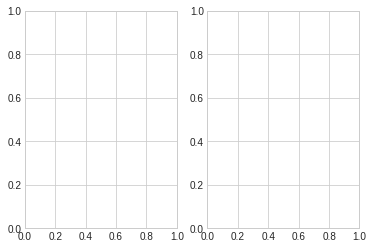

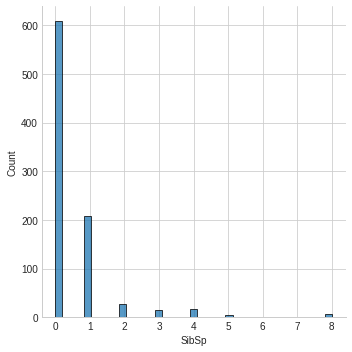

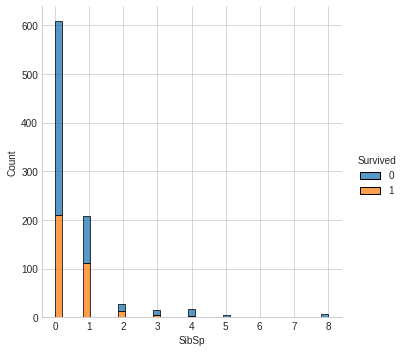

In [47]:
fig,ax=plt.subplots(1,2)
sns.displot(data=train,x='SibSp',ax=ax[0])
sns.displot(data=train,x='SibSp',hue='Survived',multiple='stack',ax=ax[1])
fig.show()

# **Feature:Parch ****
Describtion : the number of children /parents the passenger has aboard the titanic 



In [48]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

In [49]:
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

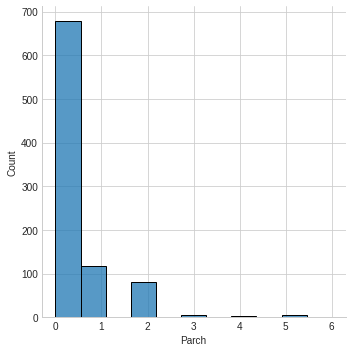

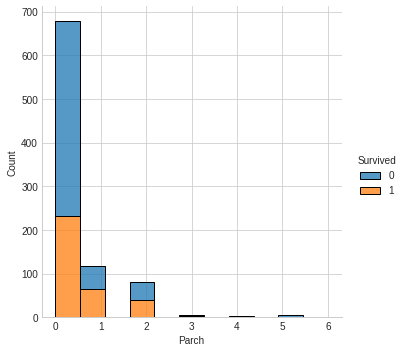

In [50]:
sns.displot(data=train,x='Parch',ax=ax[0])
sns.displot(data=train,x='Parch',hue='Survived',multiple='stack',ax=ax[1])

# **Feature:Ticket**


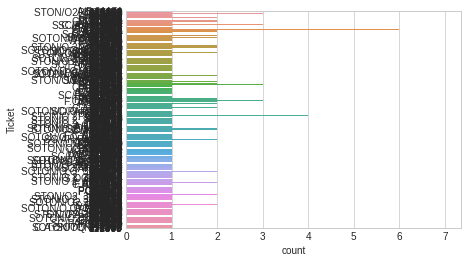

In [51]:
 sns.countplot(y='Ticket',data=train)

In [52]:
nombre=train.groupby('Ticket')['PassengerId'].sum()
print(nombre)


Ticket
110152         1523
110413         1408
110465          587
110564          431
110813          367
               ... 
W./C. 6608     1409
W./C. 6609      236
W.E.P. 5734      93
W/C 14208       220
WE/P 5735      1287
Name: PassengerId, Length: 681, dtype: int64


In [53]:
train.Ticket.value_counts( )

1601             7
347082           7
CA. 2343         7
CA 2144          6
347088           6
                ..
27849            1
29751            1
SC/PARIS 2146    1
113055           1
29104            1
Name: Ticket, Length: 681, dtype: int64

# **Featur:Fare**
describtion:how much the ticket coast

In [54]:
train.Fare.isnull().sum()

0

In [55]:
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],bins=5)

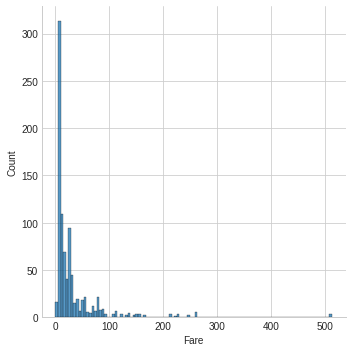

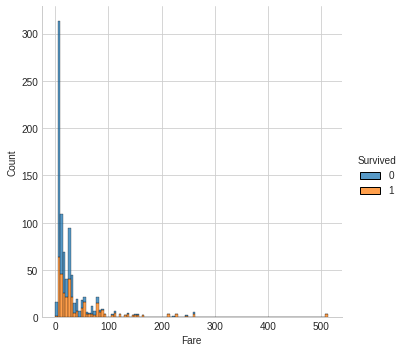

In [56]:
sns.displot(data=train,x='Fare',ax=ax[0])
sns.displot(data=train,x='Fare',hue='Survived',multiple='stack',ax=ax[1])

In [57]:
df_bin.head()

Survived  Pclass  Sex  Age  SibSp  Parch               Fare
0         0       3    0   22      1      0  (-0.512, 102.466]
1         1       1    1   38      1      0  (-0.512, 102.466]
2         1       3    1   26      0      0  (-0.512, 102.466]
3         1       1    1   35      1      0  (-0.512, 102.466]
4         0       3    0   35      0      0  (-0.512, 102.466]

# **Featur:Cabin**


In [58]:
train.Cabin.isnull().sum()

687

In [59]:
train.Cabin.value_counts()[:20]

B96 B98            4
C23 C25 C27        4
G6                 4
F2                 3
F33                3
D                  3
E101               3
C22 C26            3
C123               2
E24                2
D36                2
F G73              2
B58 B60            2
B49                2
E25                2
C2                 2
F4                 2
B57 B59 B63 B66    2
D26                2
B77                2
Name: Cabin, dtype: int64

# **Featur:Embarked**
Description:the port where the passengers aboarded the titanic

In [60]:
train.Embarked.isnull().sum()

2

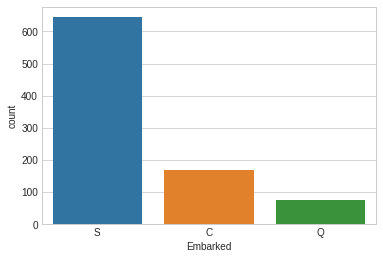

In [61]:
sns.countplot(x='Embarked',data=train)

C=cherboug,Q=queenstown,S=southampton

In [62]:
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']

In [63]:
 print(len(df_con))
 df_bin=df_bin.dropna(subset=['Embarked'])
 df_con=df_con.dropna(subset=['Embarked'])
 print(len(df_con))

891
889


# **Feature:Encoding**
Nom we have our two sub dataframe ready ,we can encode the features so they're ready to be used with our machine elarning models
we will encode our binered dataframe(df_bin)with one-hote encoding and our continuois dataframe(df_con)with the label encoding function from sklearn.


In [64]:
#initiaate the onehote encoder
#ohe=OneHotEncoder(sparse=False)

In [65]:
df_bin.head()

Survived  Pclass  Sex  Age  SibSp  Parch               Fare Embarked
0         0       3    0   22      1      0  (-0.512, 102.466]        S
1         1       1    1   38      1      0  (-0.512, 102.466]        C
2         1       3    1   26      0      0  (-0.512, 102.466]        S
3         1       1    1   35      1      0  (-0.512, 102.466]        S
4         0       3    0   35      0      0  (-0.512, 102.466]        S

In [66]:
df_bin=df_bin.drop('Survived',axis='columns')

In [67]:
df_bin.head()

Pclass  Sex  Age  SibSp  Parch               Fare Embarked
0       3    0   22      1      0  (-0.512, 102.466]        S
1       1    1   38      1      0  (-0.512, 102.466]        C
2       3    1   26      0      0  (-0.512, 102.466]        S
3       1    1   35      1      0  (-0.512, 102.466]        S
4       3    0   35      0      0  (-0.512, 102.466]        S

In [68]:
#from sklearn.compose import make_column_transformer

In [69]:
#df_bin=make_column_transformer(
#(OneHotEncoder(),['Sex','Embarked']),
#remainder='passthrough')

In [70]:
#one_hot encode binned variables
one_hot_cols=df_bin.columns.tolist()
df_bin_enc=pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_enc.head()

Pclass_1  Pclass_2  Pclass_3  ...  Embarked_C  Embarked_Q  Embarked_S
0         0         0         1  ...           0           0           1
1         1         0         0  ...           1           0           0
2         0         0         1  ...           0           0           1
3         1         0         0  ...           0           0           1
4         0         0         1  ...           0           0           1

[5 rows x 98 columns]

In [71]:
#label encode all continous values using labelEncoder()
df_con_enc=df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       2    1   22      1      0    18         2
1         1       0    0   38      1      0   207         0
2         1       2    0   26      0      0    41         2
3         1       0    0   35      1      0   189         2
4         0       2    1   35      0      0    43         2

# **Start building Machine learning models**

# **L'ets seperate the data**

In [72]:
#selecting the dataframe we want use first for prediction
selected_df=df_con_enc

In [73]:
#Split the dataframe into data and labels
X_train=selected_df.drop('Survived',axis=1)#data
y_train=selected_df.Survived#label

In [74]:
X_train.shape

(889, 7)

In [75]:
y_train.shape

(889,)

fonction that runs the requested algorithme and rturns the accuracy metrics


In [76]:
def fit_ml_algo(algo,X_train,y_train,cv):
   
  model=algo.fit(X_train,y_train)#the model fit
  acc=round(model.score(X_train,y_train)*100,2)#calculate accuracy

  #cross validation
  train_pred=model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs=-1)
  #cross validation metrics
  acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
  return train_pred,acc,acc_cv

# **Logistic Regression**

In [77]:
start_time=time.time()#to start calculate time
#return the values in fonction and use it with new paramters
train_pred_log,acc_log,acc_cv_log=fit_ml_algo(LogisticRegression(),X_train,y_train,10)


log_time=(time.time()-start_time)
print("Accuracy :%s"%acc_log)
print('accuracy CV 10-fold:%s'%acc_cv_log)
print('runing time:%s'% datetime.timedelta(seconds=log_time))


Accuracy :79.75
accuracy CV 10-fold:78.85
runing time:0:00:01.634097


# **K-Nearest Neighbours**

In [78]:
start_time=time.time()#to start calculate time
#return the values in fonction and use it with new paramters
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),X_train,y_train,10)


knn_time=(time.time()-start_time)
print("Accuracy :%s"%acc_knn)
print('accuracy CV 10-fold:%s'%acc_cv_knn)
print('runing time:%s'% datetime.timedelta(seconds=knn_time))

Accuracy :78.18
accuracy CV 10-fold:69.4
runing time:0:00:00.133936


# **Gaussian Naive bayes**

In [79]:
start_time=time.time()#to start calculate time
#return the values in fonction and use it with new paramters
train_pred_gaussian,acc_gaussian,acc_cv_gaussian=fit_ml_algo(GaussianNB(),X_train,y_train,10)


gaussian_time=(time.time()-start_time)
print("Accuracy :%s"%acc_gaussian)
print('accuracy CV 10-fold:%s'%acc_cv_gaussian)
print('runing time:%s'% datetime.timedelta(seconds=gaussian_time))

Accuracy :76.49
accuracy CV 10-fold:76.15
runing time:0:00:00.061260


# **Linear Support Vector Machines(SVC)**

In [80]:
start_time=time.time()#to start calculate time
#return the values in fonction and use it with new paramters
train_pred_svc,acc_svc,acc_cv_svc=fit_ml_algo(LinearSVC(),X_train,y_train,10)


svc_time=(time.time()-start_time)
print("Accuracy :%s"%acc_svc)
print('accuracy CV 10-fold:%s'%acc_cv_svc)
print('runing time:%s'% datetime.timedelta(seconds=svc_time))

Accuracy :75.14
accuracy CV 10-fold:66.14
runing time:0:00:00.396906


# **Stochastic Gardient descent**

In [81]:
start_time=time.time()#to start calculate time
#return the values in fonction and use it with new paramters
train_pred_sgd,acc_sgd,acc_cv_sgd=fit_ml_algo(SGDClassifier(),X_train,y_train,10)


sgd_time=(time.time()-start_time)
print("Accuracy :%s"%acc_sgd)
print('accuracy CV 10-fold:%s'%acc_cv_sgd)
print('runing time:%s'% datetime.timedelta(seconds=sgd_time))

Accuracy :77.05
accuracy CV 10-fold:63.1
runing time:0:00:00.093305


# **Decision tree classifier**

In [82]:
start_time=time.time()#to start calculate time
#return the values in fonction and use it with new paramters
train_pred_dt,acc_dt,acc_cv_dt=fit_ml_algo(DecisionTreeClassifier(),X_train,y_train,10)


dt_time=(time.time()-start_time)
print("Accuracy :%s"%acc_dt)
print('accuracy CV 10-fold:%s'%acc_cv_dt)
print('runing time:%s'% datetime.timedelta(seconds=dt_time))

Accuracy :97.64
accuracy CV 10-fold:79.08
runing time:0:00:00.084706


# **Gardient Boost Trees**

In [83]:
start_time=time.time()#to start calculate time
#return the values in fonction and use it with new paramters
train_pred_gbt,acc_gbt,acc_cv_gbt=fit_ml_algo(GradientBoostingClassifier(),X_train,y_train,10)


gbt_time=(time.time()-start_time)
print("Accuracy :%s"%acc_gbt)
print('accuracy CV 10-fold:%s'%acc_cv_gbt)
print('runing time:%s'% datetime.timedelta(seconds=gbt_time))

Accuracy :89.43
accuracy CV 10-fold:83.01
runing time:0:00:01.116434


# **CatBoost Algorithm**

In [84]:
X_train.head()

Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       2    1   22      1      0    18         2
1       0    0   38      1      0   207         0
2       2    0   26      0      0    41         2
3       0    0   35      1      0   189         2
4       2    1   35      0      0    43         2

In [85]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
#Define the categorical features for the Catboost model
cat_features=np.where(X_train.dtypes!=np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5, 6])

this mean catboost picked up that all variables except Fare can be treated as categorical.

In [87]:
#use the catboost pool()function to pool together the training data and categorical featur labels
train_pool=Pool(X_train,y_train,cat_features)

In [88]:
#catboost model definition 
catboost_model=CatBoostClassifier(iterations=1000,
                                  custom_loss=['Accuracy'],
                                  loss_function='Logloss')
#fit the model 
catboost_model.fit(train_pool,
                   plot=True)
#catboost accuracy
acc_catboost=round(catboost_model.score(X_train,y_train)*100,2)




Learning rate set to 0.009797


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6873775	total: 65.5ms	remaining: 1m 5s
1:	learn: 0.6819329	total: 77ms	remaining: 38.4s
2:	learn: 0.6768154	total: 80.6ms	remaining: 26.8s
3:	learn: 0.6714559	total: 88.4ms	remaining: 22s
4:	learn: 0.6663391	total: 97.4ms	remaining: 19.4s
5:	learn: 0.6608615	total: 105ms	remaining: 17.3s
6:	learn: 0.6557134	total: 113ms	remaining: 16s
7:	learn: 0.6505673	total: 124ms	remaining: 15.3s
8:	learn: 0.6460145	total: 128ms	remaining: 14.1s
9:	learn: 0.6414120	total: 135ms	remaining: 13.4s
10:	learn: 0.6370123	total: 145ms	remaining: 13s
11:	learn: 0.6323069	total: 159ms	remaining: 13.1s
12:	learn: 0.6273831	total: 174ms	remaining: 13.2s
13:	learn: 0.6246657	total: 181ms	remaining: 12.8s
14:	learn: 0.6203743	total: 206ms	remaining: 13.6s
15:	learn: 0.6163063	total: 215ms	remaining: 13.2s
16:	learn: 0.6125971	total: 224ms	remaining: 12.9s
17:	learn: 0.6085960	total: 233ms	remaining: 12.7s
18:	learn: 0.6048136	total: 242ms	remaining: 12.5s
19:	learn: 0.6015030	total: 244ms	remaining:

In [89]:
#cross validtion the model 

start_time=time.time()

#set params for cross-validation as same as initial model
cv_params=catboost_model.get_params()

#run the cross validation for 10-fold
cv_data=cv(train_pool,cv_params,fold_count=10,plot=True)

#how long did it take!?
catboost_time =(time.time()-start_time)

#catboost CV results save into a dataframe,l'ets withdraw the maximum accuracy srcore
acc_cv_catboost=round(np.max(cv_data['test-Accuracy-mean'])*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6777899	test: 0.6784206	best: 0.6784206 (0)
1:	learn: 0.6618660	test: 0.6624649	best: 0.6624649 (1)
2:	learn: 0.6461428	test: 0.6470117	best: 0.6470117 (2)
3:	learn: 0.6316887	test: 0.6329300	best: 0.6329300 (3)
4:	learn: 0.6192054	test: 0.6202433	best: 0.6202433 (4)
5:	learn: 0.6072532	test: 0.6089726	best: 0.6089726 (5)
6:	learn: 0.5958587	test: 0.5981840	best: 0.5981840 (6)
7:	learn: 0.5853169	test: 0.5877977	best: 0.5877977 (7)
8:	learn: 0.5754145	test: 0.5786721	best: 0.5786721 (8)
9:	learn: 0.5658204	test: 0.5699931	best: 0.5699931 (9)
10:	learn: 0.5565746	test: 0.5610519	best: 0.5610519 (10)
11:	learn: 0.5490205	test: 0.5537630	best: 0.5537630 (11)
12:	learn: 0.5420524	test: 0.5474890	best: 0.5474890 (12)
13:	learn: 0.5350010	test: 0.5410177	best: 0.5410177 (13)
14:	learn: 0.5282793	test: 0.5348509	best: 0.5348509 (14)
15:	learn: 0.5221236	test: 0.5289553	best: 0.5289553 (15)
16:	learn: 0.5166894	test: 0.5240859	best: 0.5240859 (16)
17:	learn: 0.5110623	test: 0.51880

In [90]:
#Print out the catboost model metrics
print("Accuracy :{}".format(acc_catboost))
print('accuracy CV 10-fold:{}'.format(acc_cv_catboost))
print('runing time:{}'.format(datetime.timedelta(seconds=catboost_time)))

Accuracy :89.09
accuracy CV 10-fold:81.88
runing time:0:00:48.133707


In [91]:
cv_Model=pd.DataFrame({
    'Model':['KNN','Logistic Regression','Naive bayes',
             'Stichastic Gardient Decent','Linear SVC',
             'Decision Tree','Gradient boosting Trees',
             'Catboost'],
    'Score':[
             acc_cv_knn,
             acc_cv_log,
             acc_cv_gaussian,
             acc_cv_sgd,
             acc_cv_svc,
             acc_cv_dt,
             acc_cv_gbt,
             acc_cv_catboost
    ]    })
print('------Cross validation Accuracy Scores----')
cv_Model.sort_values(by='Score',ascending=False)

------Cross validation Accuracy Scores----


Model  Score
6     Gradient boosting Trees  83.01
7                    Catboost  81.88
5               Decision Tree  79.08
1         Logistic Regression  78.85
2                 Naive bayes  76.15
0                         KNN  69.40
4                  Linear SVC  66.14
3  Stichastic Gardient Decent  63.10

# **Features Importance**

In [92]:
#function to show wich features are most important in the model
def feature_importance(model,data):
  
  fea_imp=pd.DataFrame({'imp':model.feature_importance_,'col':data.columns})
  fea_imp=fea_imp.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
  _ =fea_imp.plot(kind='barh',x='col',y='imp',figsize=(20,10))
  return fea_imp

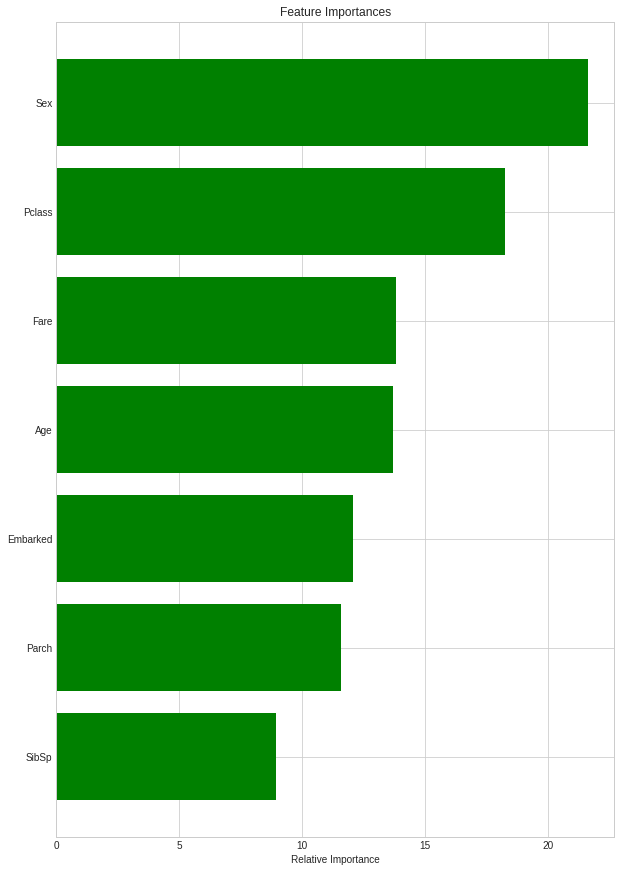

In [93]:
#plot the features importance score
features = X_train.columns
importances = catboost_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **Percision and recall**
percision and recall are two metrics which are used for cases where you have an imbalanced classification problem.
for exmple you may have 1000000 people and 1 only of them gets a certain disease if your model predicts that all people don't have the disease it only misses 1 in 1000000 so its accuracy is 99,999% but this isn't realy helpful

In [95]:
#metrics=['Precicion','Recall','F1','AUC']
##eval_metrics=catboost_model.eval_metrics(train_pool,
       #                                  metrics=metrics,
        #                                 plot=True)
##for metric in metrics:
 ## print(str(metric)+':{}'.format(np.mean(eval_metrics[metric])))

# **Submission**

In [96]:
#creat a list of columns to be used in the prediction it must be the same to train columns
wanted_test_columns=X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [97]:
#make prediction using the catboost model on tha wanted columns
prediction=catboost_model.predict(test[wanted_test_columns]
                                  .apply(LabelEncoder().fit_transform))

In [98]:
#our prediciton array is comprised of 0 and 1 (survived or dead)
prediction[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [99]:
#creat a submition dataFrame and append the relevant columns
submition=pd.DataFrame()
submition['PassengerId']=test['PassengerId']
submition['Survived']=prediction
submition.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [100]:
#what does our submition have to like?
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

we need our dataframe submition to look like the gender_submition dataframe,so we'll turn the survived columns into integer

In [101]:
submition['Survived']=submition['Survived'].astype(int)
print('converted survived column into integer')

converted survived column into integer


In [102]:
#are our test and submition dataframe the same length?
if len(submition)==len(test):
  print('submition dataframe is the same length as test ({}rows.'.format(len(submition)))
else:
    print('dataframe mismatched,wont be able to submit to kaggle.')

submition dataframe is the same length as test (418rows.


In [103]:
#convert our submition dataframe to csv for kaggle submition
submition.to_csv("submition",index=False)
print('the submition is ready ')

the submition is ready 


In [104]:
df.head()

NameError: ignored